In [619]:
naslib_path = '../zero_cost/NASLib'
benchmark = 'zc_transbench101_micro'

In [620]:
from zc_combine.utils.naslib_utils import load_search_space, parse_scores


search_space = load_search_space(naslib_path, benchmark)
dfs = parse_scores(search_space)

In [631]:
dfs['class_scene']

,net,val_accs,fisher,flops,grad_norm,grasp,jacov,l2_norm,nwot,params,plain,snip,zen,epe_nas,synflow,random,rank
0,"(2, 3, 2, 3, 2, 3)",53.836586,3.174986,4662.861824,64.768837,5.518723,-32.010179,1264.200439,500.471008,22.372959,0.054214,550.899719,140.815979,802.848077,108.135345,1196,369.0
1,"(3, 1, 1, 2, 1, 2)",53.015526,0.562997,1719.869440,18.909435,-0.165627,-32.021362,729.956726,482.974210,7.892319,0.037001,165.184418,80.187653,501.475615,79.879640,2254,1217.0
2,"(0, 0, 2, 1, 2, 3)",30.423965,0.029831,1971.068928,2.849045,-0.033377,-33.801906,770.203125,418.689953,9.612639,0.055472,12.357190,8.856546,265.841208,19.184819,3954,3475.5
3,"(3, 3, 3, 3, 0, 0)",52.652271,0.282446,5463.056384,6.920995,-0.001285,-32.013348,827.065552,488.810221,26.098271,0.009920,63.563175,103.793137,595.278783,49.046419,3231,1539.0
4,"(2, 1, 0, 1, 3, 0)",52.229301,0.351973,1801.887744,11.134655,0.025872,-32.030780,630.637512,473.122466,8.757343,0.014053,106.561142,62.000206,742.104402,77.862220,4089,1926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,"(1, 3, 1, 2, 0, 3)",53.528065,0.693319,3062.046720,21.534018,-0.106752,-32.009532,728.597961,482.940877,14.708063,0.025799,203.994125,85.878929,508.249514,89.948026,1572,690.0
4092,"(2, 2, 2, 0, 3, 3)",50.059715,5.959549,3577.946112,80.114166,3.291931,-32.022111,1065.925781,494.299803,17.624671,0.019977,661.133789,109.263565,546.374618,107.547941,1633,2801.0
4093,"(1, 3, 2, 2, 2, 0)",35.330414,0.156446,1890.197504,10.138708,0.059343,-32.058257,947.143921,489.758141,8.749407,0.038364,78.050766,88.663208,511.395873,53.379629,4033,3046.0
4094,"(3, 0, 1, 0, 2, 2)",51.398289,3.351303,1718.722560,45.285702,1.366714,-32.012223,650.391052,478.398117,7.890527,0.012577,369.511902,65.573013,479.542548,84.773604,3021,2501.5


In [414]:
import numpy as np

def filter_by_range(df, zc, min, max):
    return df[(df[zc] >= min) & (df[zc] <= max)]


def filter_by_ops(df, op_set, all_present=False):
    ops = df['net'].str.strip('()').str.split(', ').to_list()

    index = []
    for i in range(len(df)):
        ops[i] = [int(o) for o in ops[i]]
        op_row = set(ops[i])

        if len(op_row.union(op_set)) > len(op_set):
            continue

        if all_present:
            if len(op_set.difference(op_row)) > 0:
                continue
        index.append(i)

    return df.iloc[index]

In [4]:
#filt = filter_by_range(dfs['cifar10'], 'nwot', 800, 850)
#filt = filter_by_range(dfs['cifar10'], 'nwot', 799, 799.5)
filt = filter_by_range(dfs['cifar10'], 'nwot', 810, 825)

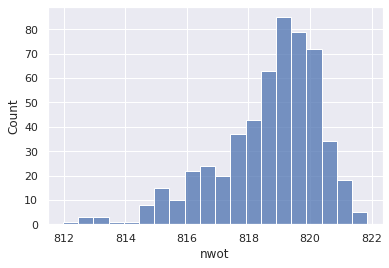

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(filt['nwot'])
plt.show()

In [137]:
filt['val_accs'].max()

91.57

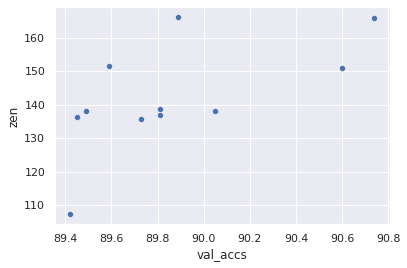

In [54]:
sns.scatterplot(data=filt, x='val_accs', y='zen')
plt.show()

In [131]:
import numpy as np

ids = np.array(filt['net'].str.strip('()').str.split(', ').to_list())

In [132]:
np.unique(ids, return_counts=True)

(array(['0', '1', '2', '3', '4'], dtype='<U1'),
 array([1422, 1217, 4844, 4880, 1215]))

In [133]:
np.unique(np.sum(ids == '0', axis=1), return_counts=True)

(array([0, 1, 2]), array([1074,  956,  233]))

In [89]:
ids = np.array(dfs['cifar10']['net'].str.strip('()').str.split(', ').to_list())
np.unique(ids, return_counts=True)

(array(['0', '1', '2', '3', '4'], dtype='<U1'),
 array([18750, 18750, 18750, 18750, 18750]))

In [94]:
ids.shape

(544, 6)

In [632]:
dfs.keys()

dict_keys(['class_scene', 'class_object', 'autoencoder', 'normal', 'jigsaw', 'room_layout', 'segmentsemantic', 'ninapro', 'svhn', 'scifar100'])

In [645]:
only_2_4 = dfs['class_object'] # filter_by_ops(dfs['class_object'], {2, 3, 4})
#only_2_4 = only_2_4[only_2_4['net'].str.count(',') == 5]


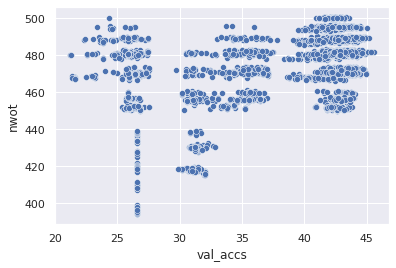

In [646]:
sns.scatterplot(data=only_2_4, x='val_accs', y='nwot')
#plt.xlim(70, 91)
#plt.ylim(300, 850)
plt.show()

In [647]:
counts = only_2_4['net'].str.count('3') + only_2_4['net'].str.count('2')
counts

0       6
1       3
2       3
3       4
4       2
       ..
4091    3
4092    5
4093    4
4094    3
4095    3
Name: net, Length: 4096, dtype: int64

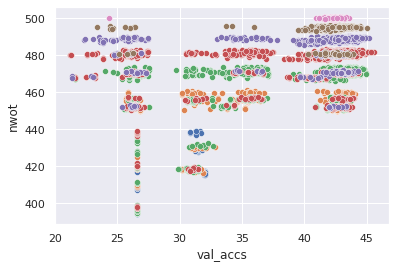

In [648]:
sns.scatterplot(data=only_2_4[counts == 0], x='val_accs', y='nwot')
sns.scatterplot(data=only_2_4[counts == 1], x='val_accs', y='nwot')
sns.scatterplot(data=only_2_4[counts == 2], x='val_accs', y='nwot')
sns.scatterplot(data=only_2_4[counts == 3], x='val_accs', y='nwot')
sns.scatterplot(data=only_2_4[counts == 4], x='val_accs', y='nwot')
sns.scatterplot(data=only_2_4[counts == 5], x='val_accs', y='nwot')
sns.scatterplot(data=only_2_4[counts == 6], x='val_accs', y='nwot')
#plt.xlim(70, 91)
#plt.ylim(300, 850)
plt.show()

In [590]:
only_2_4[counts == 4].sort_values('val_accs')

,net,val_accs,fisher,flops,grad_norm,grasp,jacov,l2_norm,nwot,params,plain,snip,zen,epe_nas,synflow,random,rank
538,"(3, 1, 2, 4, 2, 1)",41.336586,1.742460,6043.273728,22.442257,1.439457,-32.011482,557.749512,474.577650,20.831236,0.111677,235.447632,84.010689,522.421131,102.508973,1335,2975.0
1097,"(3, 1, 3, 1, 2, 2)",41.535629,0.405528,1149.371648,10.231384,0.838123,-32.010791,390.091766,454.844004,3.270788,0.024119,65.471664,74.896637,562.430200,94.423248,2173,2873.0
3148,"(3, 2, 3, 2, 1, 1)",41.928741,1.243554,2689.828096,18.559616,1.346850,-32.011550,504.475647,466.589493,8.152836,0.058688,156.222656,81.924805,680.303426,101.416115,1735,2670.5
1587,"(4, 3, 1, 1, 1, 2)",41.998409,0.418824,1778.353408,9.455626,0.408638,-32.010952,458.407196,459.740616,5.050500,0.017566,78.660591,79.375534,622.333482,99.951886,2825,2635.5
1505,"(3, 3, 2, 2, 2, 1)",42.013336,1.451729,5526.489600,17.857361,1.769365,-32.012293,568.771484,466.420566,20.835460,0.067188,174.054565,85.818817,657.786603,102.357982,3208,2620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,"(2, 1, 1, 4, 2, 3)",46.790405,1.049619,20324.616704,13.923615,0.672105,-32.013574,615.716125,517.515200,21.975940,-0.010339,154.833389,88.363319,737.443648,105.545450,0,11.0
1053,"(2, 2, 4, 3, 1, 1)",46.800358,4.903842,26768.640512,31.692522,4.416946,-32.011244,743.967712,517.341734,39.676804,0.069564,414.140137,93.356476,663.414499,110.867059,2112,10.0
1899,"(2, 4, 1, 2, 1, 3)",46.865047,1.505113,27569.228288,17.146196,1.288853,-32.013872,706.517456,514.269148,32.596868,0.012363,214.603424,92.210098,899.986080,109.635856,233,8.0
1351,"(2, 2, 3, 1, 1, 4)",46.989452,0.880052,20325.665280,14.701825,1.175609,-32.013208,621.906372,517.250016,18.239876,0.029850,152.422882,89.409042,1002.042928,106.869020,1542,4.0


In [561]:
o2 = filter_by_range(only_2_4, 'nwot', 440, 450)

In [562]:
o2

,net,val_accs,fisher,flops,grad_norm,grasp,jacov,l2_norm,nwot,params,plain,snip,zen,epe_nas,synflow,random,rank
3,"(4, 3, 3, 1, 3, 2)",41.973526,1.886227,906.493184,34.928699,8.012875,-32.011908,490.587555,448.190014,5.083780,0.050013,292.181854,79.654526,663.741288,97.784467,1141,2642.5
14,"(3, 4, 1, 4, 1, 1)",42.938892,1.528585,971.044096,25.209860,3.067698,-32.018572,488.091705,447.230115,8.136196,0.129238,209.999954,77.941269,779.277489,100.644408,2768,1982.0
18,"(3, 3, 1, 3, 2, 4)",41.127586,1.108668,402.156800,28.355051,10.714993,-32.014754,401.838684,440.384146,3.275012,0.073392,180.214523,73.582848,818.091248,93.306503,2384,3050.0
42,"(3, 1, 3, 4, 1, 3)",41.351513,1.183533,520.185472,26.485701,6.577244,-32.016213,389.364441,446.583721,2.208644,0.076727,173.124512,71.292984,701.394748,93.599922,2244,2968.0
47,"(4, 3, 3, 3, 1, 2)",41.650082,1.916415,878.107904,37.702835,17.970688,-32.011109,490.482910,447.131995,5.083780,0.057141,300.341980,79.296013,826.036899,97.015350,536,2819.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,"(4, 3, 3, 1, 1, 3)",41.734673,1.666572,910.714496,34.201790,11.786476,-32.013041,454.760437,449.178716,3.562116,0.048980,260.177917,76.224304,744.784183,97.501617,2857,2766.5
3206,"(3, 3, 1, 1, 4, 1)",42.277069,0.728927,434.567808,17.063375,2.172314,-32.017639,354.128632,441.784706,1.749124,0.070682,105.823166,69.321190,820.588389,92.952293,555,2453.5
3208,"(3, 1, 3, 4, 2, 1)",40.679737,1.135290,758.265088,23.514416,5.293198,-32.013138,435.651123,448.193823,5.484164,0.102328,165.731842,75.695984,642.957622,96.571225,2720,3157.0
3227,"(3, 4, 3, 1, 2, 2)",43.486267,0.962742,1131.391488,20.379360,3.079027,-32.014325,528.296692,444.403044,12.440324,0.077770,176.179123,83.252701,551.009042,100.118491,752,1579.0


In [499]:
s = filter_by_range(only_2_4, 'nwot', 520, 560)

In [500]:
s

,net,val_accs,fisher,flops,grad_norm,grasp,jacov,l2_norm,nwot,params,plain,snip,zen,epe_nas,synflow,random,rank
26,"(1, 1, 2, 2, 1, 4)",45.431927,0.858958,30339.320320,11.028534,-0.150351,-32.015425,509.357574,529.143182,13.747076,0.041939,104.692574,82.407829,643.579984,101.539680,1495,341.5
39,"(2, 1, 2, 4, 1, 3)",46.297771,1.420511,34025.835008,18.494337,1.353255,-32.012431,679.735474,526.199206,30.826372,0.004350,222.261932,90.892517,415.923003,108.301620,2750,61.0
48,"(2, 2, 1, 2, 3, 3)",44.008759,1.743050,67341.191680,22.652912,1.640316,-32.009559,738.631409,541.754761,32.860036,0.003444,289.862213,95.280212,566.757348,109.700768,2711,1213.5
59,"(2, 2, 1, 4, 3, 1)",45.645901,2.002544,34027.407872,26.313873,1.958296,-32.014966,706.584717,527.120339,32.596868,0.070421,317.720734,91.996696,791.442337,109.596367,897,252.5
87,"(1, 2, 1, 2, 2, 3)",44.192875,0.977913,58209.421824,13.681297,0.018176,-32.010602,597.086975,539.131504,21.533060,0.049123,157.100067,88.137016,646.358071,104.298641,3248,1090.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,"(2, 1, 1, 1, 2, 3)",45.596138,0.588587,20604.822784,9.497854,-0.051247,-32.028950,491.707977,526.452242,6.870404,0.067862,87.015091,82.807693,584.282770,101.846490,63,270.0
3179,"(2, 2, 1, 3, 2, 3)",45.934517,1.076619,34096.613888,17.676020,0.894210,-32.009403,691.708130,528.866411,25.582980,0.093495,205.388397,93.518028,601.120050,108.333673,3082,145.5
3199,"(1, 2, 2, 1, 3, 1)",45.919586,1.029583,26040.640768,13.516673,0.116011,-32.014713,526.153381,526.967887,9.968516,0.075348,128.710831,83.108673,680.000148,103.221067,290,152.0
3220,"(1, 2, 2, 2, 3, 3)",45.899681,1.358876,58272.057856,17.913292,1.229820,-32.009884,692.901123,537.081491,30.646660,0.004441,211.088684,92.389610,820.291788,106.947928,1161,161.5


In [344]:
s = filter_by_range(only_2_4, 'nwot', 550, 650)


In [347]:
np.unique(s['net'].str.count('2') + s['net'].str.count('3'), return_counts=True)

(array([0, 1, 2, 3]), array([662, 394, 196,  32]))

In [180]:
s = only_2_4.sort_values('nwot').reset_index()

In [184]:
s['net'].str.count('4')

0     6
1     5
2     5
3     5
4     5
     ..
59    1
60    1
61    1
62    1
63    0
Name: net, Length: 64, dtype: int64

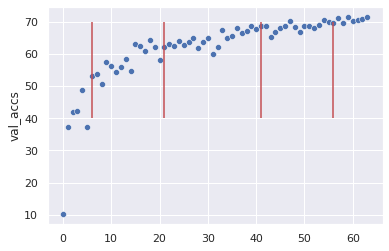

In [192]:
sns.scatterplot(data=s, x=s.index, y='val_accs')
plt.vlines(6,40, 70, color='r')
plt.vlines(21,40, 70, color='r')
plt.vlines(41,40, 70, color='r')
plt.vlines(56,40, 70, color='r')
plt.show()